<a href="https://colab.research.google.com/github/Adrianus-Bagas/Drug_Prediction/blob/main/Drug_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Pemakaian Obat Menggunakan Decision Tree

# 1. Import beberapa libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 2. Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
df = pd.read_csv('/content/drive/MyDrive/dataset/drug200.csv')

In [43]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# 3. Preprocessing

In [44]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [45]:
for col in ['Cholesterol', 'Drug', 'Sex', 'BP']:
    if df[col].dtype == 'O':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [46]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [47]:
X = df.drop('Drug',axis=1)
Y = df['Drug']

# 4. Model Decision Tree

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)

In [51]:
param_grid_dt = {"criterion": ['gini','entropy'],
                  "max_depth": [2, 3, 5, 8, 10, 15, 20]}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, scoring="accuracy", cv=10, verbose=0, n_jobs=-1)

grid_dt.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 8, 10, 15, 20]},
             scoring='accuracy')

In [52]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [53]:
model = DecisionTreeClassifier(criterion='gini',max_depth=5)
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [56]:
model.score(X_train, Y_train), model.score(X_test, Y_test)

(1.0, 1.0)

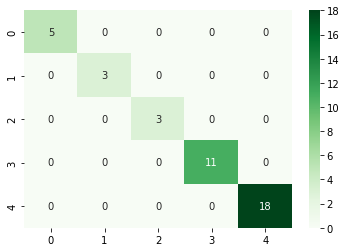

In [58]:
def model_evaluation(classifier):
    cm = confusion_matrix(Y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(5,5)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')
model_evaluation(model)